## Step1. Preprocess and smooth
- preprocess: process1(silence_filter and zero_padding)
- smooth: [maad.sound.smooth](https://scikit-maad.github.io/generated/maad.sound.smooth.html#maad.sound.smooth)

In [1]:
import numpy as np
import scipy

import maad
import librosa
from IPython.display import Audio

import matplotlib.pyplot as plt
%matplotlib inline

from config import *
from utils import *

In [2]:
s, fs = librosa.load(r'D:\srdp\dataset\data\kouzhao\kouzhao.025.wav',sr=16000) 
Audio(s, rate=fs)

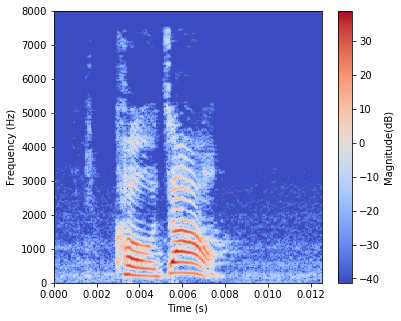

In [3]:
draw_spec(s)

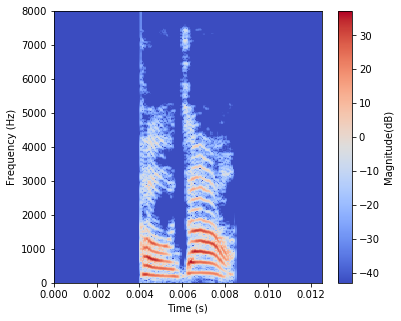

In [4]:
s1 = process1(s)
Axx_dB = draw_spec(s1,retn=True)

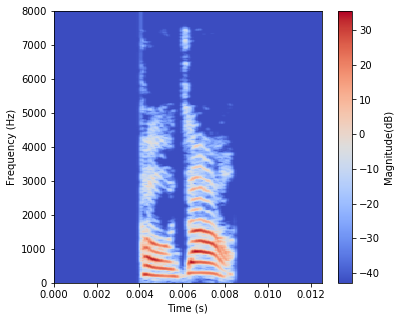

In [5]:
Axx_dB_std1 = maad.sound.smooth(Axx_dB, std=1.0)
draw_spec(Axx_dB_std1)

In [6]:
A_signal = librosa.stft(s, n_fft=FS, hop_length=HOP, win_length=WIN) 
process1 = librosa.istft(librosa.db_to_amplitude(Axx_dB_std1) * np.exp(1j * np.angle(A_signal)), hop_length=HOP, win_length=WIN)
Audio(process1, rate=fs)